In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from fbprophet import Prophet

In [2]:
data_path = ''

In [5]:
cuba = pd.read_csv(data_path+'cuba_temperature.csv')
dt_var = 'dt'
target_var = 'AverageTemperature'
cuba = cuba[[dt_var, target_var]]
cuba[dt_var] = pd.to_datetime(cuba[dt_var])

In [4]:
def prophet_train_and_predict(df, f_timestep, freq):
    m.fit(df)
    future = m.make_future_dataframe(periods=f_timestep, freq=freq)[-f_timestep:]
    forecast_df = m.predict(future)
    
    return forecast_df

In [7]:
# change datetime column name to 'ds', target column name to 'y'
cuba.columns = ['ds', 'y']

In [12]:
split_idx = len(cuba) - 60
cuba_train = cuba[:split_idx]
cuba_test = cuba[split_idx:]
train_X, train_y = cuba_train['ds'], cuba_train['y']
test_X, test_y = cuba_test['ds'], cuba_test['y']

In [19]:
forecast_timestep = 60  # number of timesteps to be forecasted ahead
m = Prophet(interval_width=0.95)  # set 'seasonality_mode="multiplicative"' if seasonality is multiplicative
forecast = prophet_train_and_predict(cuba_train, forecast_timestep, 'M')  # 'M' stands for monthly interval
forecast = forecast.loc[:, ['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.columns = ['dt', 'Predicted AverageTemperature', 'Lower CI of AverageTemperature', 'Upper CI of AverageTemperature']

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# rmse
rmse = np.sqrt(mse(test_y, forecast['Predicted AverageTemperature']))
print('rmse: ', rmse)

rmse:  0.8154644221866351


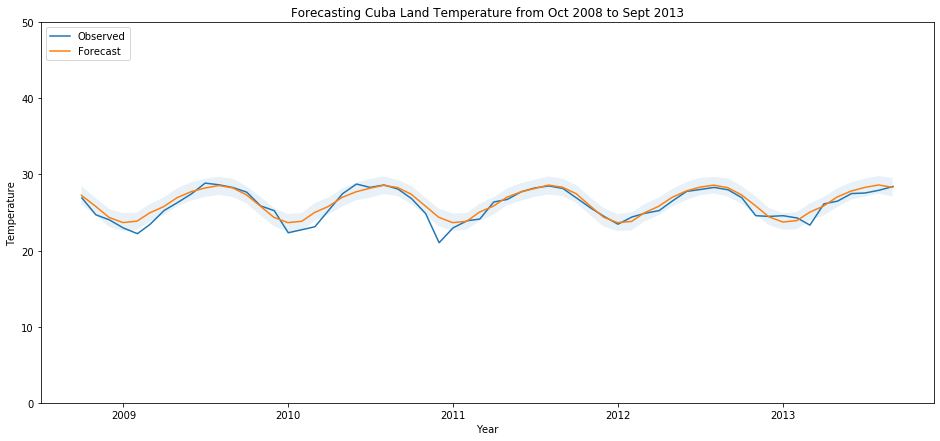

In [20]:
plt.figure(figsize=(16,7))
plt.plot(test_X, test_y, label='Observed')
plt.plot(forecast['dt'], forecast['Predicted AverageTemperature'], label='Forecast')
plt.fill_between(x=forecast['dt'], y1=forecast['Upper CI of AverageTemperature'], y2=forecast['Lower CI of AverageTemperature'], alpha=.1)
plt.legend(loc='upper left')
plt.title('Forecasting Cuba Land Temperature from Oct 2008 to Sept 2013')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.ylim([0,50])
plt.show()